# Exploratory Data Analysis

In [ ]:
#Import libraries and packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import torch
# from transformers import pipeline

In [ ]:
#Read data using chunks

import pandas as pd

file_path = '../data/raw/song_lyrics.csv'

chunk_size = 100000

chunks = []

for chunk in pd.read_csv(file_path, chunksize=chunk_size):

    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame if needed
song_lyrics_full_df = pd.concat(chunks, ignore_index=True)

# Generate sample data for EDA
#song_lyrics_sample_df =  song_lyrics_full_df.groupby('year', group_keys=False).apply(lambda x: x.sample(frac=0.01)) #take a sample based on xyz?



### Variable Descriptions

Description of each column in the dataset, as provided on [Genius Song Lyrics](https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information/data?select=song_lyrics).

| Variable | Description |
|:--------|:--------|
|  title   |  track name  | 
|  tag   |  track genre   | 
|  artist   |  artist name | 
|  year | year of release  |
|  views | number of views on [genius.com](https://genius.com)  |
|  features |  artists who feature on the track |
|  lyrics |  track lyrics |
|  id | track id, provided by genius  |
|  language_cld3 | lyrics language according to CLD3  |
|  language_ft | lyrics language according to FastText's langid  |
|  language |  Combines language_cld3 and language_ft. Only has a non NaN entry if they both "agree" |


### Views

When classifying or generating lyrics, it's important to be analysing lyrics that matter. We can use track views as a proxy for whether the lyrics matter.

The distribution of views is heavily skewed to the left. Over half of the songs in the dataset have been viewed less than 100 times, and 75% less than 500 times. 

<!--perhaps we could use views per year?-->

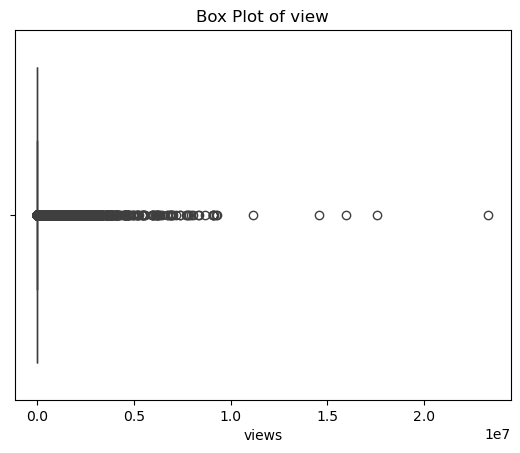

count    5.134856e+06
mean     3.060939e+03
std      4.730980e+04
min      0.000000e+00
25%      2.200000e+01
50%      8.500000e+01
75%      4.480000e+02
max      2.335142e+07
Name: views, dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize and summarize distribution
sns.boxplot(x=song_lyrics_full_df['views'])
plt.title('Box Plot of view')
plt.show()

print(song_lyrics_full_df['views'].describe())


### Tracks by Year

It appears the dataset has tracks from the *year zero* and *2100*, with an exponential spike in tracks as we close in on the millenia.

<function matplotlib.pyplot.show(close=None, block=None)>

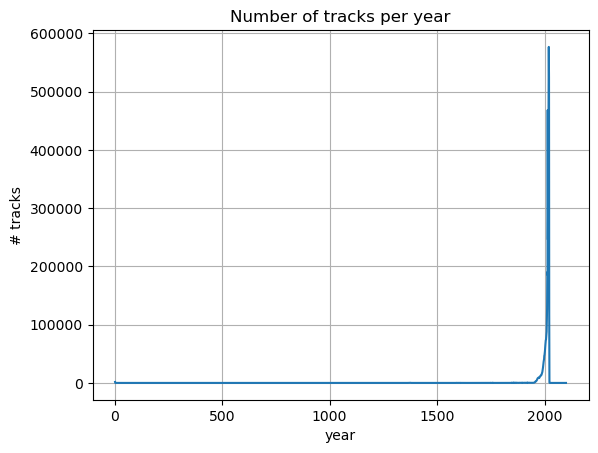

In [5]:
import matplotlib.pyplot as plt

# year - number of ids (i.e. tracks) per year. This should be plotted. (tracks by year)
track_per_year_df = song_lyrics_full_df.groupby('year').agg({'id':'count'}).reset_index()

#Generate plot
fig, ax = plt.subplots()
ax.plot(track_per_year_df['year'],track_per_year_df['id'])
ax.set(xlabel="year",ylabel="# tracks",title = "Number of tracks per year")
ax.grid()
plt.show

The evolution of popular music is said to have began in the late 19th century in *Tin Pan Alley*, an area of New York. So perhaps filtering the data from 1880 will allow us to chart the rise in tracks more closely.

<!-- https://open.lib.umn.edu/mediaandculture/chapter/6-2-the-evolution-of-popular-music/ -->

<function matplotlib.pyplot.show(close=None, block=None)>

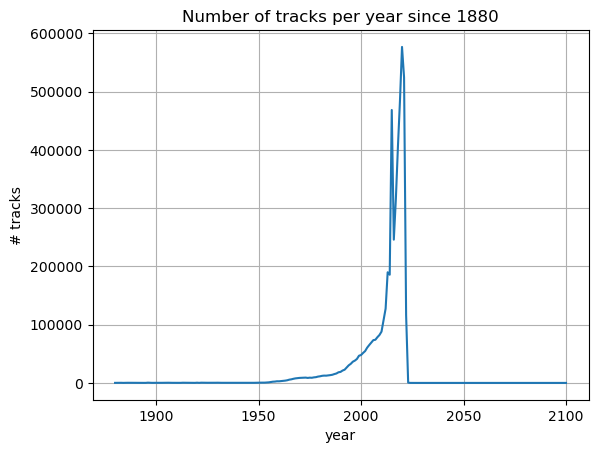

In [6]:
# year - number of ids (i.e. tracks) per year. This should be plotted. (tracks by year)
song_lyrics_from_1880_df = song_lyrics_full_df[(song_lyrics_full_df['year'] >= 1880)]
track_per_year_from_1880_df  = song_lyrics_from_1880_df.groupby('year').agg({'id':'count'}).reset_index()

#Generate plot
fig, ax = plt.subplots()
ax.plot(track_per_year_from_1880_df['year'],track_per_year_from_1880_df ['id'])
ax.set(xlabel="year",ylabel="# tracks",title = "Number of tracks per year since 1880")
ax.grid()
plt.show

The rapid rise reaches its peak in 2020 with over 575,000 tracks. There does seem to be a noticeable dip in number of tracks in 2016. This will require further investigation.

### Genre

The most popular genre of music is, understandably, pop. Rap is not too far behind, which is understandable as Genius (orginally Rap Genius) initally launched with a focus on hip-hop.

In [7]:
# tag/genre - simple table, I imagine it's dominate by pop and rock (popular genre)
popular_genre_df = song_lyrics_full_df.groupby('tag').agg({'id':'count'}).reset_index()
popular_genre_df = popular_genre_df.sort_values(by = 'id',ascending = False)
popular_genre_df = popular_genre_df.rename(columns = {"id" : "number of tracks"})
display(popular_genre_df) 

,tag,number of tracks
2,pop,2138587
3,rap,1724816
5,rock,793220
4,rb,196462
1,misc,181455
0,country,100316


### What is *misc*?
There appears to be a genre called *misc*. On closer inspection, it contains poems, books and bible passages. Given that these are not song lyrics, these will also need to be removed before our analysis and modelling.

<!--https://genius.com/Genius-tags-music-genres-countries-languages-annotated -->

In [8]:
genre_misc_df = song_lyrics_full_df[(song_lyrics_full_df['tag'] == "misc")]
genre_misc_df = genre_misc_df.head(10)

display(genre_misc_df)

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
683,Penny for a Thought,misc,Saul Williams,2001,6118,{},Cancel the apocalypse!\nCartons of the milky w...,660,en,en,en
1322,John 1,misc,Holy Bible (KJV),2017,3375,{},"John 1:1: In the beginning was the Word, and t...",1292,en,en,en
1323,John 2,misc,Holy Bible (KJV),2017,983,{},John 2:1: And the third day there was a marria...,1293,en,en,en
1324,John 3,misc,Holy Bible (KJV),2017,2129,{},"John 3:1: There was a man of the Pharisees,\nn...",1294,en,en,en
1383,Do Not Go Gentle Into That Good Night,misc,Dylan Thomas,1951,190091,{},Do not go gentle into that good night.\nOld ag...,1466,en,en,en
1392,The Second Coming,misc,William Butler Yeats,1920,103203,{},Turning and turning in the widening gyre\nThe ...,1467,en,en,en
1420,Her It,misc,John Berryman,2010,356,{},I fell in love with a girl\nO and a gash\nI'll...,1474,en,en,en
1472,Im Nobody Who Are You?,misc,Emily Dickinson,1891,37027,{},I'm Nobody! Who are you?\nAre you—Nobody—Too?\...,1454,en,en,en
1481,Buffalo Bills,misc,E. E. Cummings,2010,9142,{},Buffalo Bill's\ndefunct\n who used to\n ...,1462,en,en,en
1486,Ego-Tripping there may be a reason,misc,Nikki Giovanni,2010,149574,{},I was born in the Congo\nI walked to the Ferti...,1468,en,en,en


### Artists

When it comes to the number of tracks, there is only one artist in the top ten that is a musician/band - *The Grateful Dead* with over 2,100 tracks. The list is populated by *Genius translations*, the most popular being *Genius Romanizations* which enables people to pronounce lyrics phoentically.

However, the list of artists is more familiar if we rank them by total views. One Genius translation survives, but *Drake* has the crown. As expected, the list is dominated by rap and hip-hop.

In [9]:
#Artists - top 10 number by id (popular_artists_df)
artist_top_ten_df = song_lyrics_full_df.groupby('artist').agg({'id':'count'}).reset_index()
artist_top_ten_df['rank'] = artist_top_ten_df['id'].rank(ascending= False)
artist_top_ten_df = artist_top_ten_df.sort_values(by = 'rank')
artist_top_ten_df = artist_top_ten_df.rename(columns = {"id" : "number of tracks"})
artist_top_ten_df = artist_top_ten_df.head(10)

display(artist_top_ten_df)


,artist,number of tracks,rank
212538,Genius Romanizations,16325,1.0
212480,Genius English Translations,13832,2.0
212464,Genius Brasil Tradues,8693,3.0
212560,Genius Traducciones al Espaol,7083,4.0
212563,Genius Traductions Franaises,4680,5.0
212567,Genius Trke eviri,3941,6.0
212542,Genius Russian Translations ( ),3069,7.0
557805,The Grateful Dead,2121,8.0
212473,Genius Deutsche bersetzungen,1750,9.0
212564,Genius Traduzioni Italiane,1657,10.0


In [10]:
# Artist - top 10 artists by number of views (popular_artist_x_views_df)
artist_top_ten_views_df = song_lyrics_full_df.groupby('artist').agg({'views':'sum'}).reset_index()
artist_top_ten_views_df['rank'] = artist_top_ten_views_df['views'].rank(ascending= False)
artist_top_ten_views_df = artist_top_ten_views_df.sort_values(by = 'rank')
artist_top_ten_views_df = artist_top_ten_views_df.head(10)

display(artist_top_ten_views_df)

,artist,views,rank
162463,Drake,290399287,1.0
178799,Eminem,200053017,2.0
212480,Genius English Translations,166147761,3.0
294551,Kanye West,165987900,4.0
300279,Kendrick Lamar,148673371,5.0
212538,Genius Romanizations,130613600,6.0
565594,The Weeknd,118931875,7.0
548763,Taylor Swift,99135311,8.0
254818,J. Cole,95504023,9.0
611925,XXXTENTACION,90966813,10.0


### Artists formally known as *Genius*

There appears to be around 400 artists containing the word "Genius". While many of them are *Genius Translations*, there are notable exceptions (Perfume Genius, boygenius). In an absence of a systematic way of identifying Genius Translations from Non-Genius Translations, it will be easier to filter them out as we prepare our data for analysis and modelling.

In [11]:
# Artists with "Genius" in their title

genius_artists_df = song_lyrics_full_df[song_lyrics_full_df['artist'].str.contains('Genius', case=False, na=False)]
genius_artists_df = genius_artists_df.groupby('artist').agg({'id':'count'}).reset_index()

display(genius_artists_df)



,artist,id
0,(Genius Nochang),85
1,genius (who?),4
2,50 Best Rap Songs of 2015 Lyrics - Genius,1
3,50 Best Songs of 2015 Lyrics - Genius,1
4,7xvethegenius,21
...,...,...
443,boygenius,11
444,crive On Genius,2
445,geniuscontributor,1
446,iAmTheGENIUS,2


### Features

Similar to artists, the *Genius Translations* dominate the number of features, but Drake retains another crown when it comes to total views.

In [12]:
# features (most popular feature?) - most features (popular_features_df)
# Need to remove {} brakcets
features_top_ten_views_df = song_lyrics_full_df.groupby('features').agg({'id':'count'}).reset_index()
features_top_ten_views_df['rank'] = features_top_ten_views_df['id'].rank(ascending= False)
features_top_ten_views_df = features_top_ten_views_df.rename(columns = {"id" : "number of tracks"})
features_top_ten_views_df = features_top_ten_views_df.sort_values(by = 'rank')
features_top_ten_views_df = features_top_ten_views_df.head(10)

display(features_top_ten_views_df)

,features,number of tracks,rank
442405,{},3961625,1.0
90380,"{""Genius Brasil Traduções""}",8692,2.0
90436,"{""Genius Traducciones al Español""}",7071,3.0
90443,"{""Genius Traductions Françaises""}",4674,4.0
90450,"{""Genius Türkçe Çeviri""}",3933,5.0
90424,"{""Genius Russian Translations (Русский перевод)""}",3064,6.0
90383,"{""Genius Deutsche Übersetzungen""}",1747,7.0
204437,"{""Polskie tłumaczenia Genius""}",1348,8.0
141501,"{""La Bible de Jérusalem""}",1189,9.0
90391,"{""Genius Farsi Translations (ترجمه‌ی فارسی)""}",1031,10.0


In [13]:
# features (most popular feature?) - most features (popular_features_df)
# Need to remove {} brakcets
features_top_ten_views_df = song_lyrics_full_df.groupby('features').agg({'views':'sum'}).reset_index()
features_top_ten_views_df['rank'] = features_top_ten_views_df['views'].rank(ascending= False)
features_top_ten_views_df = features_top_ten_views_df.sort_values(by = 'rank')
features_top_ten_views_df = features_top_ten_views_df.head(10)

display(features_top_ten_views_df)

,features,views,rank
442405,{},10455148832,1.0
332916,{Drake},79483840,2.0
313477,{Beyoncé},51296386,3.0
131922,"{""Kendrick Lamar""}",36751457,4.0
258960,"{""Tyler / The Creator""}",36473868,5.0
278957,"{""\\$UICIDEBOY\\$""}",35731039,6.0
294371,"{""​twenty one pilots""}",34349038,7.0
125293,"{""Justin Bieber""}",29924232,8.0
151535,"{""Lil Wayne""}",28784132,9.0
189041,"{""Nicki Minaj""}",28126310,10.0


### Language

Unsurprisingly, European languages dominates the most number of tracks and views, across time and since the dawn of popular music in 1880.
There are over 3 million english language tracks, although a proportion of them will be *Genius English Translations*. In any case, because the aim is to analyse lyric sentiment and generate lyrics in English, there seems to be enough data in whcih to make an attempt.

In [14]:
#Most popular language
popular_lang_df = song_lyrics_full_df.groupby('language').agg({'id':'count','views':'sum'}).reset_index()
popular_lang_df ['rank'] = popular_lang_df ['views'].rank(ascending= False)
popular_lang_df  = popular_lang_df.rename(columns = {"id" : "number of tracks"})
popular_lang_df  = popular_lang_df.sort_values(by = 'rank')
popular_lang_df  = popular_lang_df.head(10)

display(popular_lang_df)

,language,number of tracks,views,rank
15,en,3374198,12175728644,1.0
23,fr,189436,573275888,2.0
65,ru,166044,560252468,3.0
17,es,275432,386925647,4.0
13,de,160150,370613897,5.0
36,it,118775,251241472,6.0
61,pl,83862,156839895,7.0
77,tr,44692,156312482,8.0
63,pt,167947,69437613,9.0
42,ko,27979,61734288,10.0


In [15]:
#Most popular language since dawn of popular music
popular_lang_1880_df = song_lyrics_from_1880_df.groupby('language').agg({'id':'count','views':'sum'}).reset_index()
popular_lang_1880_df ['rank'] = popular_lang_1880_df  ['views'].rank(ascending= False)
popular_lang_1880_df   = popular_lang_1880_df .rename(columns = {"id" : "number of tracks"})
popular_lang_1880_df   = popular_lang_1880_df .sort_values(by = 'rank')
popular_lang_1880_df   = popular_lang_1880_df .head(10)

display(popular_lang_1880_df)

# #Most popular langauge by views and year
# popular_lang_views_df = song_lyrics_sample_df.groupby(['year','language']).agg({'views':'sum'}).reset_index()
# display(popular_lang_views_df)

,language,number of tracks,views,rank
15,en,3360743,12141249977,1.0
23,fr,189035,572596368,2.0
65,ru,165923,560233299,3.0
17,es,275326,386889167,4.0
13,de,159590,369978839,5.0
36,it,118540,251029223,6.0
77,tr,44676,156303198,7.0
61,pl,83722,154659951,8.0
63,pt,167823,69417040,9.0
42,ko,27978,61734284,10.0


### Lyrics
Pink Floyd mean a lot to me. They are the first band I listened to meaningfully. I repeatedely watched live versions of *Us and Them* and *Wish You Were Here* on *Delicate Sound of Thunder* VHS.

We can use these tracks to examine the format of the lyrics in the dataset. A couple of things stand out:

* Special characters to denote line breaks (\n).
* Square brackets contain section markers (e.g. verse), song credits and features. The section makers could be very useful as tokens in a large language model to generate lyrics for a specific section (i.e. lyrics + rock + verse)


In [16]:
us_and_them_df = song_lyrics_full_df[(song_lyrics_full_df['artist'] == "Pink Floyd") & (song_lyrics_full_df['title'] == "Us and Them")]

display(us_and_them_df['lyrics'].values)


array(['[Verse 1: David Gilmour & Richard Wright]\nUs (Us, us, us, us, us) and them (Them, them, them, them)\nAnd after all we\'re only ordinary men\nMe (Me, me, me, me, me) and you (You, you, you, you, you)\nGod only knows it\'s not what we would choose to do\n"Forward" he cried from the rear\nAnd the front rank died\nThe general sat and the lines on the map\nMoved from side to side\n\n[Verse 2: David Gilmour & Richard Wright]\nBlack (Black, black, black, black) and blue (Blue, blue, blue, blue)\nAnd who knows which is which and who is who\nUp (Up, up, up, up, up) and down (Down, down, down, down)\nAnd in the end it\'s only round and round, and round\n"Haven\'t you heard it\'s a battle of words?"\nThe poster bearer cried\n"Listen, son," said the man with the gun\n"There\'s room for you inside"\n\n[Interlude]\nI mean, they\'re not gonna kill ya\nSo like, if you give \'em a quick short, sharp, shock\nThey won\'t do it again\nDig it? I mean he got off lightly\n\'Cause I would\'ve given h

In [17]:
wish_you_were_here_df = song_lyrics_full_df[(song_lyrics_full_df['artist'] == "Pink Floyd") & (song_lyrics_full_df['title'] == "Wish You Were Here")]

display(wish_you_were_here_df['lyrics'].values)

array(["[Spoken Intro]\nAnd disciplinary remains mercifully\nYes and um, I’m with you Derek, this star nonsense\nYes, yes, now which is it?\nI am sure of it\n\n[Twelve-string guitar Intro]\n\n[Verse]\nSo, so you think you can tell\nHeaven from Hell? Blue skies from pain?\nCan you tell a green field from a cold steel rail?\nA smile from a veil? Do you think you can tell?\nDid they get you to trade your heroes for ghosts?\nHot ashes for trees? Hot air for a cool breeze?\nCold comfort for change? Did you exchange\nA walk-on part in the war\nFor a lead role in a cage?\n\n[Acoustic Guitar Solo]\n[Chorus]\nHow I wish, how I wish you were here\nWe're just two lost souls swimming in a fishbowl year after year\nRunning over the same old ground, what have we found?\nThe same old fears, wish you were here\n\n[Instrumental Outro & Scatting]"],
      dtype=object)